<a href="https://colab.research.google.com/github/rmacfar/portfolio/blob/main/Heart_Disease_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heart Disease Study: A Comparative Analysis of Cardiac Referrals from Clevelend, USA, and Budapest, Hungary

**Author:** Rachelle MacFarlane

**Date:** January 26, 2026

**Dataset:** UCI Heart Disease Dataset (1988)

---

## Executive Summary
This analysis compares heart disease patterns between patients referred to the **Cleveland Clinic Foundation** (Ohio, USA) and the **Hungarian Institute of Cardiology** (Budapest, Hungary). Using the data from **574** patients referred for cardiac testing, we explore the differences in demographics, risk factors, and disease prevalance between the two populations.

**Key Findings:**
- Cleveland patients show a higher heart disease diagnosis rate at **46%** compared to Budapest at **37%**
- Cleveland patients are older on average (54 vs 48 years of age)
- Both locations show the rate of male presentation at **~70%**
- Risk factors differ slightly between the two populations.

---
# Introduction

According to the World Health Organization, cardiovascular disease cause approximately 17.9 million deaths annually. Understanding how risk factors and disease patterns can vary across global populations can inform targeted prevention strategies.

> **How do heart disease risk factors and diagnosis ranges differ between patients at the Cleveland Clinic and the Hungarian Institute of Cardiology?**

## Dataset information
The UCI Heart Disease dataset contains records from patients referred for **coronary angiography**, an invasive procedure done in a Catheterization Lab. This means:
- These are not random samples of the general population.
- All patients displayed symptoms or risk factors severe enough to warrant a referral to a speciality clinic.
- The "no heart diagnosis" patients still had warning signs, but they tested negative for a confirmed heart disease diagnosis.

## Data Sources
| Location | Hospital | Lead Researcher | Patients |
|----------|----------|-----------------|----------|
| Cleveland | Cleveland Clinic Foundation | Robert, Detrano, M.D, Ph.D | 304 |
| Hungary | Hunagrian Institute of Cardiology | Andras, Janosi, M.D | 270* |

*After removing records with missing cholesterol data.


---
# Data Loading & Cleaning

## Import libraries:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import kagglehub

### Load Data

In [2]:
# Download from Kaggle
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load in
df = pd.read_csv(path + "/heart_disease_uci.csv")

# See what we're working with
print(f"Total records: {len(df)}")
print(f"Columns: {len(df.columns)}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Total records: 920
Columns: 16


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Data Validity

Before analyzing, we need to check the quality of the data collected across all four locations in the dataset:

In [3]:
print("Data Quality Assessment")
print("=" * 25)

for loc in df['dataset'].unique():
  subset = df[df['dataset'] == loc]
  chol_zeros = (subset['chol'] == 0).sum()
  chol_nulls = subset['chol'].isnull().sum()
  total_issues = chol_zeros + chol_nulls
  quality_issues = (total_issues / len(subset)) * 100

  print (f"\n{loc}:")
  print(f"  Total records: {len(subset)}")
  print(f"  Cholesterol zeros: {chol_zeros}")
  print(f"  Cholesterol nulls: {chol_nulls}")
  print(f"  Total issues: {quality_issues:.1f}%")

Data Quality Assessment

Cleveland:
  Total records: 304
  Cholesterol zeros: 0
  Cholesterol nulls: 0
  Total issues: 0.0%

Hungary:
  Total records: 293
  Cholesterol zeros: 0
  Cholesterol nulls: 23
  Total issues: 7.8%

Switzerland:
  Total records: 123
  Cholesterol zeros: 123
  Cholesterol nulls: 0
  Total issues: 100.0%

VA Long Beach:
  Total records: 200
  Cholesterol zeros: 49
  Cholesterol nulls: 7
  Total issues: 28.0%


---
# Decision:

Switzerland has 100% missing cholesterol values and VA Long Beach has 28% missing. These datasets cannot be used for accurate comparison.

As only two have complete/ near complete data, we will compare only **Cleveland** and **Budapest**.

#Data Cleaning

Let's rename the columns for better readability:

In [4]:
df = df.rename(columns={
    'cp': 'chest_pain',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg',
    'thalch': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'num': 'diagnosis_heart_disease',
    'dataset': 'location'
})
print("Renamed columns:")
print(df.columns.tolist())

Renamed columns:
['id', 'age', 'sex', 'location', 'chest_pain', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'slope', 'num_major_vessels', 'thalassemia', 'diagnosis_heart_disease']


In [5]:
print(df['sex'].value_counts().to_string())

sex
Male      726
Female    194


Datasets for each location:

In [6]:
# Cleveland is the most complete data set - no cleaning
cleveland = df[df['location'] == 'Cleveland'].copy()

# Hungary - remove 23 rows with missing cholesterol data
hungary = df[df['location'] == 'Hungary'].copy()
hungary = hungary.dropna(subset=['cholesterol'])

print(f"Cleveland: {len(cleveland)} patients")
print(f"Budapest: {len(hungary)} patients (after removing missing data)")
print(f"Total for analysis: {len(cleveland) + len(hungary)} patients")

Cleveland: 304 patients
Hungary: 270 patients (after removing missing data)
Total for analysis: 574 patients


In [20]:
# Cleveland documented their confirmed heart diagnosis by severity on a scale from 1-4, Hungary documented the same category as a confirmed Yes or No. We will standardize this:

cleveland['has_heart_disease'] = cleveland['diagnosis_heart_disease'].apply(
    lambda x: 'No' if x == 0 else 'Yes'
)

hungary['has_heart_disease'] = hungary['diagnosis_heart_disease'].apply(
    lambda x: 'No' if x == 0 else 'Yes'
)

cle_counts = cleveland['has_heart_disease'].value_counts()
hun_counts = hungary['has_heart_disease'].value_counts()

print("Cleveland confirmed heart disease:")
print(f"  No: {cle_counts['No']}")
print(f"  Yes: {cle_counts['Yes']}")

print("\nBudapest confirmed heart disease:")
print(f"  No: {hun_counts['No']}")
print(f"  Yes: {hun_counts['Yes']}")

Cleveland confirmed heart disease:
  No: 165
  Yes: 139

Budapest confirmed heart disease:
  No: 169
  Yes: 101


---
# Exploratory Data Analysis

## Demographics

In [8]:
def summarize_demographics(data, location_name):

    print("=" * 35)
    print(f"{location_name}")
    print("=" * 35)
    print(f"Total patients: {len(data)}")

    # Gender counts
    gender_counts = data['sex'].value_counts()
    print(f"\nGender distribution:")
    print(f"  Male: {gender_counts['Male']}")
    print(f"  Female: {gender_counts['Female']}")
    print(f"\nAge range: {data['age'].min()} - {data['age'].max()} years")
    print(f"Average age: {data['age'].sum() / len(data):.1f} years")

    # Calculate percentage with confirmed heart disease
    disease_count = (data['has_heart_disease'] == 'Yes').sum()
    disease_rate = (disease_count / len(data)) * 100
    print(f"\n Confirmed heart disease rate: {disease_rate:.1f}%")

summarize_demographics(cleveland, "CLEVELAND CLINIC")
print("\n")
summarize_demographics(hungary, "HUNGARIAN INSTITUTE OF CARDIOLOGY")

CLEVELAND CLINIC
Total patients: 304

Gender distribution:
  Male: 207
  Female: 97

Age range: 28 - 77 years
Average age: 54.4 years

 Confirmed heart disease rate: 45.7%


HUNGARIAN INSTITUTE OF CARDIOLOGY
Total patients: 270

Gender distribution:
  Male: 196
  Female: 74

Age range: 29 - 65 years
Average age: 47.9 years

 Confirmed heart disease rate: 37.4%


Risk Factors:

In [21]:
numeric_factors = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate']

print("Risk Factor Comparison -Averages")
print("=" * 60)
print(f"{'Cleveland':>45} {'Budapest':>12}")
print("=" * 60)

for factor in numeric_factors:
    cle_avg = cleveland[factor].sum() / len(cleveland)
    hun_avg = hungary[factor].sum() / len(hungary)
    print(f"{factor:<25} {cle_avg:>15.1f} {hun_avg:>15.1f}")

# Percentage
print("\n")
print("Percentage of Referred Patients With")
print("=" * 60)
print(f"{'Cleveland':>46} {'Budapest':>12}")
print("=" * 60)

# High fasting blood sugar (True)
cle_high_sugar = (cleveland['fasting_blood_sugar'] == True).sum()
hun_high_sugar = (hungary['fasting_blood_sugar'] == True).sum()
cle_pct = (cle_high_sugar / len(cleveland)) * 100
hun_pct = (hun_high_sugar / len(hungary)) * 100
print(f"{'High Fasting Blood Sugar':<35} {cle_pct:>9.1f}% {hun_pct:>9.1f}%")

# Exercise induced angina (True)
cle_angina = (cleveland['exercise_induced_angina'] == True).sum()
hun_angina = (hungary['exercise_induced_angina'] == True).sum()
cle_pct = (cle_angina / len(cleveland)) * 100
hun_pct = (hun_angina / len(hungary)) * 100
print(f"{'Exercise Induced Angina':<35} {cle_pct:>9.1f}% {hun_pct:>9.1f}%")

# Abnormal resting ECG (not "normal")
cle_abnormal_ecg = (cleveland['resting_ecg'] != 'normal').sum()
hun_abnormal_ecg = (hungary['resting_ecg'] != 'normal').sum()
cle_pct = (cle_abnormal_ecg / len(cleveland)) * 100
hun_pct = (hun_abnormal_ecg / len(hungary)) * 100
print(f"{'Abnormal Resting ECG':<35} {cle_pct:>9.1f}% {hun_pct:>9.1f}%")

# Chest pain - asymptomatic
cle_asymp = (cleveland['chest_pain'] == 'asymptomatic').sum()
hun_asymp = (hungary['chest_pain'] == 'asymptomatic').sum()
cle_pct = (cle_asymp / len(cleveland)) * 100
hun_pct = (hun_asymp / len(hungary)) * 100
print(f"{'Asymptomatic Chest Pain':<35} {cle_pct:>9.1f}% {hun_pct:>9.1f}%")


Risk Factor Comparison -Averages
                                    Cleveland     Budapest
age                                  54.4            47.9
resting_blood_pressure              131.7           132.0
cholesterol                         246.3           251.3
max_heart_rate                      149.7           138.5


Percentage of Referred Patients With
                                     Cleveland     Budapest
High Fasting Blood Sugar                 14.8%       7.0%
Exercise Induced Angina                  32.6%      31.5%
Abnormal Resting ECG                     50.3%      20.7%
Asymptomatic Chest Pain                  47.4%      43.0%


In [10]:
print("Average Max Heart Rate:")
print("=" * 45)

# Cleveland
cle_yes = cleveland[cleveland['has_heart_disease'] == 'Yes']
cle_no = cleveland[cleveland['has_heart_disease'] == 'No']

cle_yes_avg = cle_yes['max_heart_rate'].sum() / len(cle_yes)
cle_no_avg = cle_no['max_heart_rate'].sum() / len(cle_no)

print("Cleveland")
print(f"  Confirmed Heart Disease (Yes): {cle_yes_avg:.1f} bpm")
print(f"  Confirmed Heart Disease (No):  {cle_no_avg:.1f} bpm")

# Budapest
hun_yes = hungary[hungary['has_heart_disease'] == 'Yes']
hun_no = hungary[hungary['has_heart_disease'] == 'No']

hun_yes_avg = hun_yes['max_heart_rate'].sum() / len(hun_yes)
hun_no_avg = hun_no['max_heart_rate'].sum() / len(hun_no)

print("Budapest")
print(f"  Confirmed Heart Disease (Yes): {hun_yes_avg:.1f} bpm")
print(f"  Confirmed Heart Disease (No):  {hun_no_avg:.1f} bpm")

Average Max Heart Rate:
Cleveland
  Confirmed Heart Disease (Yes): 139.3 bpm
  Confirmed Heart Disease (No):  158.5 bpm
Budapest
  Confirmed Heart Disease (Yes): 129.1 bpm
  Confirmed Heart Disease (No):  144.1 bpm


#Visualizations

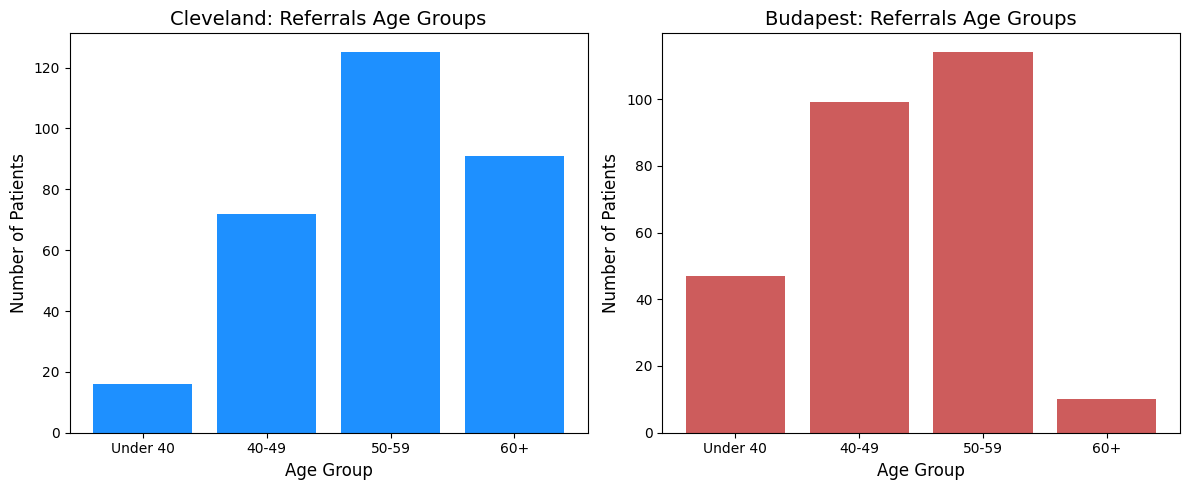

In [22]:
# Create age groups
def categorize_age(age):
    if age < 40:
        return 'Under 40'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60+'

cleveland['age_group'] = cleveland['age'].apply(categorize_age)
hungary['age_group'] = hungary['age'].apply(categorize_age)

age_order = ['Under 40', '40-49', '50-59', '60+']

# Create charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Cleveland
cle_age = cleveland['age_group'].value_counts().reindex(age_order)
axes[0].bar(age_order, cle_age.values, color='dodgerblue')
axes[0].set_title('Cleveland: Referrals Age Groups', fontsize=14)
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Number of Patients', fontsize=12)

# Budapest
hun_age = hungary['age_group'].value_counts().reindex(age_order)
axes[1].bar(age_order, hun_age.values, color='indianred')
axes[1].set_title('Budapest: Referrals Age Groups', fontsize=14)
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_ylabel('Number of Patients', fontsize=12)

plt.tight_layout()
plt.show()

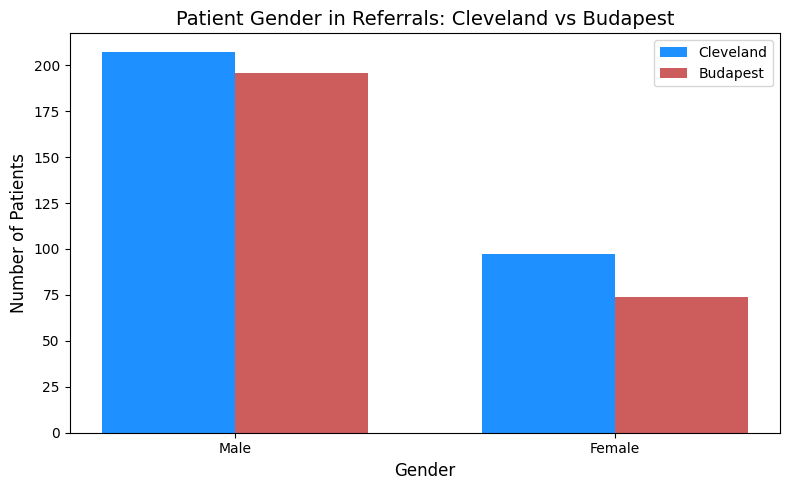

In [23]:
# Referral Gender by Location

# Calculate gender counts
cleveland_gender = cleveland['sex'].value_counts()
hungary_gender = hungary['sex'].value_counts()

# Set up plot
fig, ax = plt.subplots(figsize=(8, 5))

x = ['Male', 'Female']
cleveland_vals = [cleveland_gender.get('Male'), cleveland_gender.get('Female')]
hungary_vals = [hungary_gender.get('Male'), hungary_gender.get('Female')]

bar_width = 0.35
positions1 = [0, 1]
positions2 = [p + bar_width for p in positions1]

bars1 = ax.bar(positions1, cleveland_vals, bar_width, label='Cleveland', color='dodgerblue')
bars2 = ax.bar(positions2, hungary_vals, bar_width, label='Budapest', color='indianred')

ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Number of Patients', fontsize=12)
ax.set_title('Patient Gender in Referrals: Cleveland vs Budapest', fontsize=14)
ax.set_xticks([p + bar_width/2 for p in positions1])
ax.set_xticklabels(x)
ax.legend()

plt.tight_layout()
plt.show()

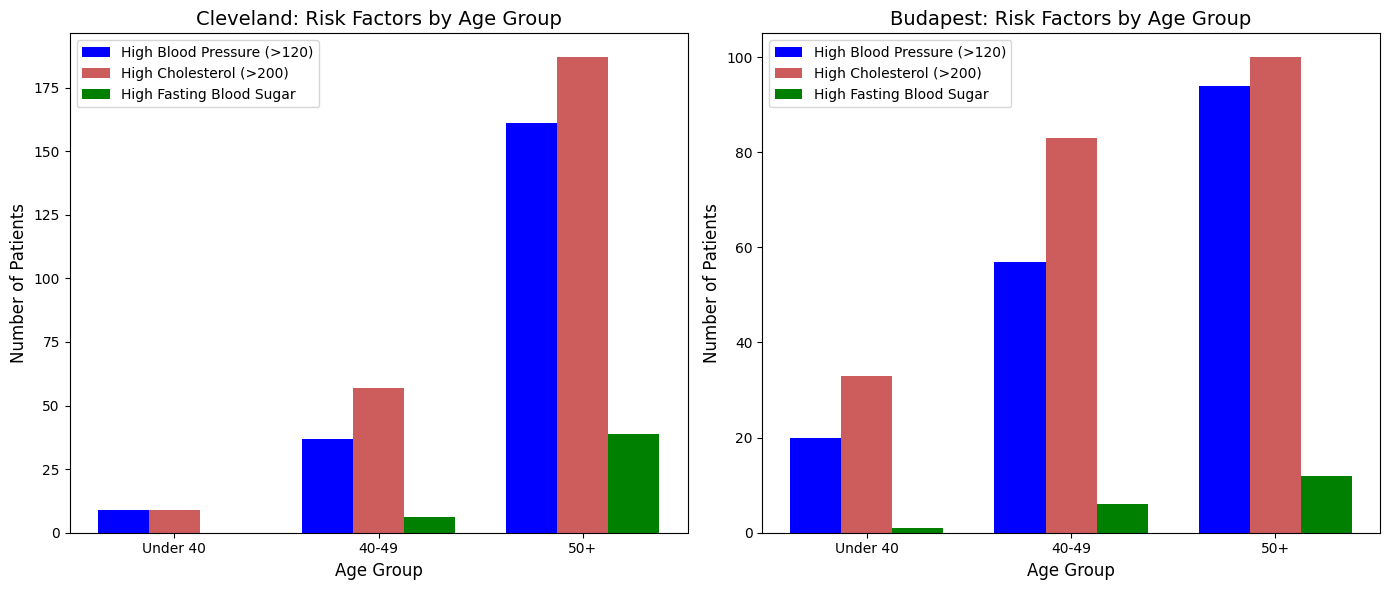


Total patients in each age group:

Cleveland:
  Under 40: 16 patients
  40-49: 72 patients
  50+: 216 patients

Budapest:
  Under 40: 47 patients
  40-49: 99 patients
  50+: 124 patients


In [13]:
# Risk Factors by Age

# Create age groups
def categorize_age(age):
    if age < 40:
        return 'Under 40'
    elif age < 50:
        return '40-49'
    else:
        return '50+'

cleveland['age_group'] = cleveland['age'].apply(categorize_age)
hungary['age_group'] = hungary['age'].apply(categorize_age)

age_groups = ['Under 40', '40-49', '50+']

# Create charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Cleveland
cle_high_bp = []
cle_high_chol = []
cle_high_sugar = []

for group in age_groups:
    group_data = cleveland[cleveland['age_group'] == group]

    high_bp = (group_data['resting_blood_pressure'] > 120).sum()
    high_chol = (group_data['cholesterol'] > 200).sum()
    high_sugar = (group_data['fasting_blood_sugar'] == True).sum()

    cle_high_bp.append(high_bp)
    cle_high_chol.append(high_chol)
    cle_high_sugar.append(high_sugar)

bar_width = 0.25
x = range(len(age_groups))

axes[0].bar(x, cle_high_bp, bar_width, label='High Blood Pressure (>120)', color='blue')
axes[0].bar([i + bar_width for i in x], cle_high_chol, bar_width, label='High Cholesterol (>200)', color='indianred')
axes[0].bar([i + bar_width*2 for i in x], cle_high_sugar, bar_width, label='High Fasting Blood Sugar', color='green')

axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_title('Cleveland: Risk Factors by Age Group', fontsize=14)
axes[0].set_xticks([i + bar_width for i in x])
axes[0].set_xticklabels(age_groups)
axes[0].legend()


hun_high_bp = []
hun_high_chol = []
hun_high_sugar = []

for group in age_groups:
    group_data = hungary[hungary['age_group'] == group]

    high_bp = (group_data['resting_blood_pressure'] > 120).sum()
    high_chol = (group_data['cholesterol'] > 200).sum()
    high_sugar = (group_data['fasting_blood_sugar'] == True).sum()

    hun_high_bp.append(high_bp)
    hun_high_chol.append(high_chol)
    hun_high_sugar.append(high_sugar)

axes[1].bar(x, hun_high_bp, bar_width, label='High Blood Pressure (>120)', color='blue')
axes[1].bar([i + bar_width for i in x], hun_high_chol, bar_width, label='High Cholesterol (>200)', color='indianred')
axes[1].bar([i + bar_width*2 for i in x], hun_high_sugar, bar_width, label='High Fasting Blood Sugar', color='green')

axes[1].set_ylabel('Number of Patients', fontsize=12)
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].set_title('Budapest: Risk Factors by Age Group', fontsize=14)
axes[1].set_xticks([i + bar_width for i in x])
axes[1].set_xticklabels(age_groups)
axes[1].legend()

plt.tight_layout()
plt.show()

# Print totals
print("\nTotal patients in each age group:")
print("\nCleveland:")
for group in age_groups:
    count = len(cleveland[cleveland['age_group'] == group])
    print(f"  {group}: {count} patients")

print("\nBudapest:")
for group in age_groups:
    count = len(hungary[hungary['age_group'] == group])
    print(f"  {group}: {count} patients")

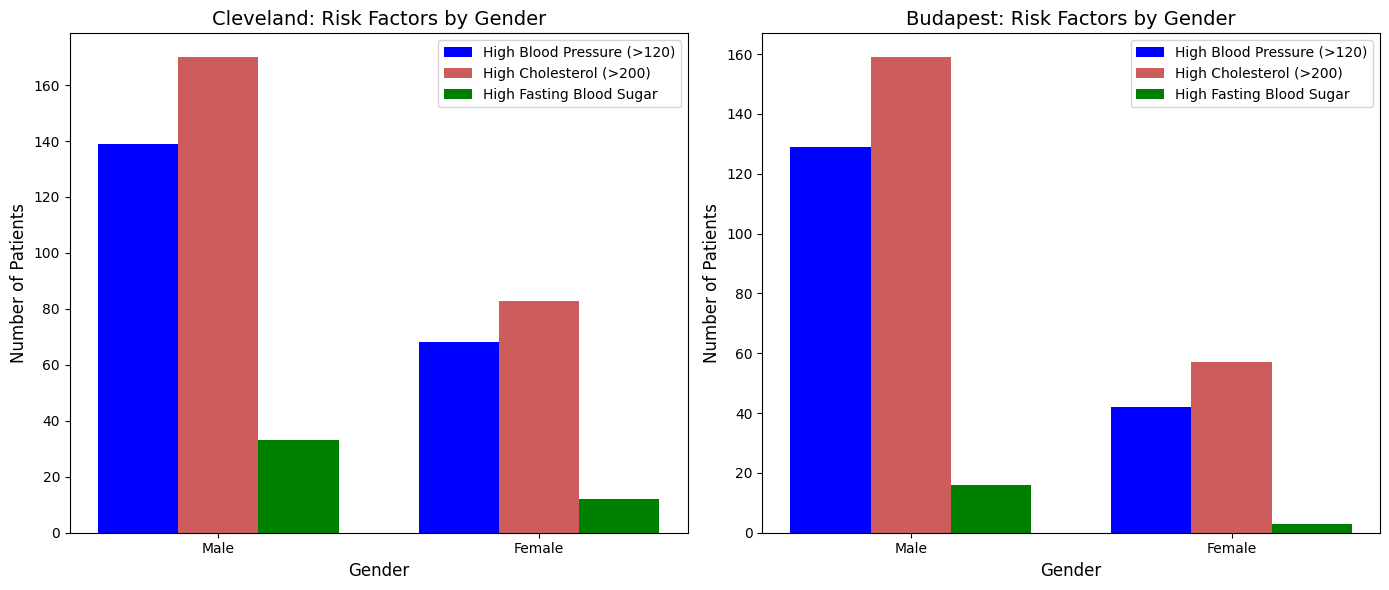


Total patients by gender:

Cleveland:
  Male: 207 patients
  Female: 97 patients

Budapest:
  Male: 196 patients
  Female: 74 patients


In [14]:
# Risk Factors by Gender

genders = ['Male', 'Female']

# Create charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

bar_width = 0.25
x = range(len(genders))

# Cleveland
cle_high_bp = []
cle_high_chol = []
cle_high_sugar = []

for gender in genders:
    group_data = cleveland[cleveland['sex'] == gender]

    high_bp = (group_data['resting_blood_pressure'] > 120).sum()
    high_chol = (group_data['cholesterol'] > 200).sum()
    high_sugar = (group_data['fasting_blood_sugar'] == True).sum()

    cle_high_bp.append(high_bp)
    cle_high_chol.append(high_chol)
    cle_high_sugar.append(high_sugar)

axes[0].bar(x, cle_high_bp, bar_width, label='High Blood Pressure (>120)', color='blue')
axes[0].bar([i + bar_width for i in x], cle_high_chol, bar_width, label='High Cholesterol (>200)', color='indianred')
axes[0].bar([i + bar_width * 2 for i in x], cle_high_sugar, bar_width, label='High Fasting Blood Sugar', color='green')

axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_title('Cleveland: Risk Factors by Gender', fontsize=14)
axes[0].set_xticks([i + bar_width for i in x])
axes[0].set_xticklabels(genders)
axes[0].legend()

# Budapest
hun_high_bp = []
hun_high_chol = []
hun_high_sugar = []

for gender in genders:
    group_data = hungary[hungary['sex'] == gender]

    high_bp = (group_data['resting_blood_pressure'] > 120).sum()
    high_chol = (group_data['cholesterol'] > 200).sum()
    high_sugar = (group_data['fasting_blood_sugar'] == True).sum()

    hun_high_bp.append(high_bp)
    hun_high_chol.append(high_chol)
    hun_high_sugar.append(high_sugar)

axes[1].bar(x, hun_high_bp, bar_width, label='High Blood Pressure (>120)', color='blue')
axes[1].bar([i + bar_width for i in x], hun_high_chol, bar_width, label='High Cholesterol (>200)', color='indianred')
axes[1].bar([i + bar_width * 2 for i in x], hun_high_sugar, bar_width, label='High Fasting Blood Sugar', color='green')

axes[1].set_ylabel('Number of Patients', fontsize=12)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_title('Budapest: Risk Factors by Gender', fontsize=14)
axes[1].set_xticks([i + bar_width for i in x])
axes[1].set_xticklabels(genders)
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nTotal patients by gender:")
print("\nCleveland:")
for gender in genders:
    count = len(cleveland[cleveland['sex'] == gender])
    print(f"  {gender}: {count} patients")

print("\nBudapest:")
for gender in genders:
    count = len(hungary[hungary['sex'] == gender])
    print(f"  {gender}: {count} patients")

In [15]:
print("Average Resting Blood Pressure:")
print("=" * 35)

for loc_name, df_loc in [('Cleveland', cleveland), ('Budapest', hungary)]:
    print(f"\n--- {loc_name} ---")
    disease_yes_bp = df_loc[df_loc['has_heart_disease'] == 'Yes']['resting_blood_pressure']
    disease_no_bp = df_loc[df_loc['has_heart_disease'] == 'No']['resting_blood_pressure']

    if not disease_yes_bp.empty:
        print(f"  Heart Disease (Yes): {disease_yes_bp.mean():.1f} mmHg")
    else:
        print("  Heart Disease (Yes): No data")

    if not disease_no_bp.empty:
        print(f"  Heart Disease (No):  {disease_no_bp.mean():.1f} mmHg")
    else:
        print("  Heart Disease (No): No data")

Average Resting Blood Pressure:

--- Cleveland ---
  Heart Disease (Yes): 134.6 mmHg
  Heart Disease (No):  129.3 mmHg

--- Budapest ---
  Heart Disease (Yes): 135.7 mmHg
  Heart Disease (No):  130.5 mmHg


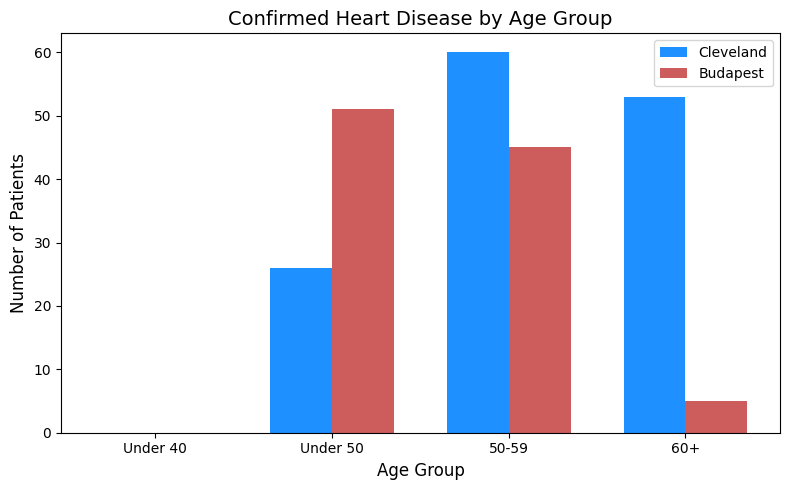

In [16]:
# Confirmed Heart Disease by Age

def categorize_age(age):
    if age < 30:
      return 'Under 40'
    if age < 50:
        return 'Under 50'
    elif age < 60:
        return '50-59'
    else:
        return '60+'

cleveland['age_group'] = cleveland['age'].apply(categorize_age)
hungary['age_group'] = hungary['age'].apply(categorize_age)

# Count heart disease cases by age group
age_groups = ['Under 40', 'Under 50', '50-59', '60+']

cle_disease = cleveland[cleveland['has_heart_disease'] == 'Yes']
hun_disease = hungary[hungary['has_heart_disease'] == 'Yes']

cle_counts = []
hun_counts = []

for group in age_groups:
    cle_count = len(cle_disease[cle_disease['age_group'] == group])
    hun_count = len(hun_disease[hun_disease['age_group'] == group])
    cle_counts.append(cle_count)
    hun_counts.append(hun_count)

# Create chart
fig, ax = plt.subplots(figsize=(8, 5))

bar_width = 0.35
x = range(len(age_groups))

ax.bar(x, cle_counts, bar_width, label='Cleveland', color='dodgerblue')
ax.bar([i + bar_width for i in x], hun_counts, bar_width, label='Budapest', color='indianred')

ax.set_ylabel('Number of Patients', fontsize=12)
ax.set_xlabel('Age Group', fontsize=12)
ax.set_title('Confirmed Heart Disease by Age Group', fontsize=14)
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(age_groups)
ax.legend()

plt.tight_layout()
plt.show()

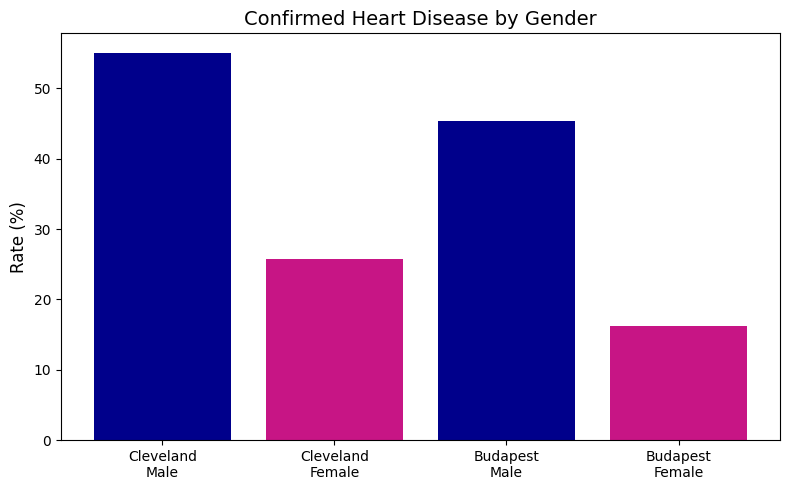

In [17]:
# Confirmed Heart Disease by Gender

# Calculate confirmed heart disease rate by gender
cle_male = cleveland[cleveland['sex'] == 'Male']
cle_female = cleveland[cleveland['sex'] == 'Female']
hun_male = hungary[hungary['sex'] == 'Male']
hun_female = hungary[hungary['sex'] == 'Female']

cle_male_rate = (cle_male['has_heart_disease'] == 'Yes').sum() / len(cle_male) * 100
cle_female_rate = (cle_female['has_heart_disease'] == 'Yes').sum() / len(cle_female) * 100
hun_male_rate = (hun_male['has_heart_disease'] == 'Yes').sum() / len(hun_male) * 100
hun_female_rate = (hun_female['has_heart_disease'] == 'Yes').sum() / len(hun_female) * 100

# Create chart
fig, ax = plt.subplots(figsize=(8, 5))

categories = ['Cleveland\nMale', 'Cleveland\nFemale', 'Budapest\nMale', 'Budapest\nFemale']
rates = [cle_male_rate, cle_female_rate, hun_male_rate, hun_female_rate]
colors = ['darkblue', 'mediumvioletred', 'darkblue', 'mediumvioletred']

ax.bar(categories, rates, color=colors)
ax.set_ylabel('Rate (%)', fontsize=12)
ax.set_title('Confirmed Heart Disease by Gender', fontsize=14)

plt.tight_layout()
plt.show()

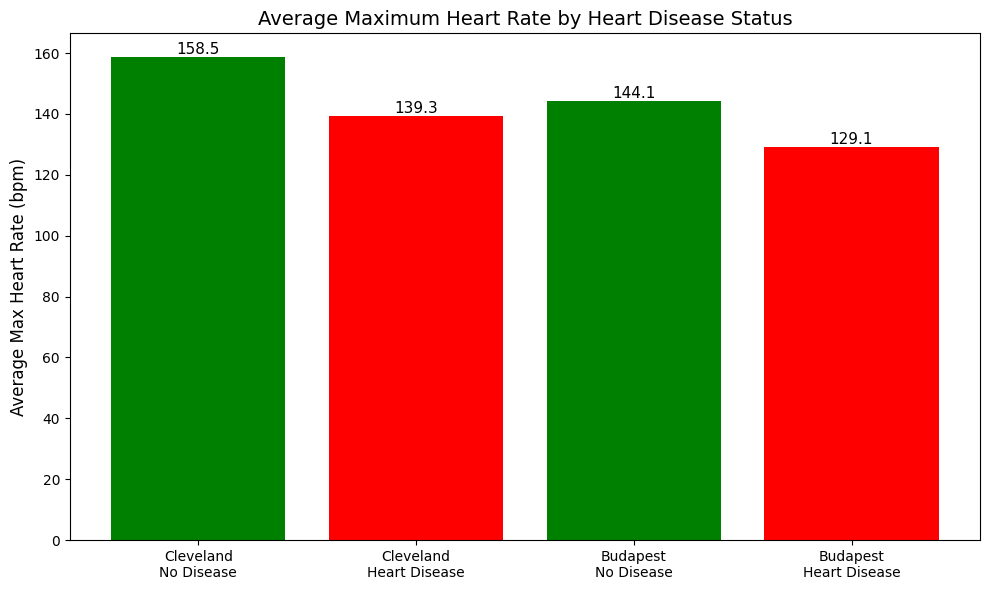


Average Maximum Heart Rate (bpm):
  Cleveland - No Disease:    158.5
  Cleveland - Heart Disease: 139.3
  Budapest - No Disease:      144.1
  Budapest - Heart Disease:   129.1


In [18]:
# Calculate average max heart rate by heart disease status
cle_disease = cleveland[cleveland['has_heart_disease'] == 'Yes']
cle_healthy = cleveland[cleveland['has_heart_disease'] == 'No']
hun_disease = hungary[hungary['has_heart_disease'] == 'Yes']
hun_healthy = hungary[hungary['has_heart_disease'] == 'No']

# Calculate averages
cle_healthy_hr = cle_healthy['max_heart_rate'].sum() / len(cle_healthy)
cle_disease_hr = cle_disease['max_heart_rate'].sum() / len(cle_disease)
hun_healthy_hr = hun_healthy['max_heart_rate'].sum() / len(hun_healthy)
hun_disease_hr = hun_disease['max_heart_rate'].sum() / len(hun_disease)

# Create chart
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['Cleveland\nNo Disease', 'Cleveland\nHeart Disease',
              'Budapest\nNo Disease', 'Budapest\nHeart Disease']
heart_rates = [cle_healthy_hr, cle_disease_hr, hun_healthy_hr, hun_disease_hr]
colors = ['green', 'red', 'green', 'red']

bars = ax.bar(categories, heart_rates, color=colors)

ax.set_ylabel('Average Max Heart Rate (bpm)', fontsize=12)
ax.set_title('Average Maximum Heart Rate by Heart Disease Status', fontsize=14)

# Add value labels on top of each bar
for bar, value in zip(bars, heart_rates):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{value:.1f}', ha='center', fontsize=11)

plt.tight_layout()
plt.show()

# Print the numbers
print("\nAverage Maximum Heart Rate (bpm):")
print(f"  Cleveland - No Disease:    {cle_healthy_hr:.1f}")
print(f"  Cleveland - Heart Disease: {cle_disease_hr:.1f}")
print(f"  Budapest - No Disease:      {hun_healthy_hr:.1f}")
print(f"  Budapest - Heart Disease:   {hun_disease_hr:.1f}")

---
#Conclusion

Summary

In [19]:
# Calculate final stats
cle_total = len(cleveland)
hun_total = len(hungary)

# Count patients with heart disease
cle_disease_count = (cleveland['has_heart_disease'] == 'Yes').sum()
hun_disease_count = (hungary['has_heart_disease'] == 'Yes').sum()

# Count male patients
cle_male_count = (cleveland['sex'] == 'Male').sum()
hun_male_count = (hungary['sex'] == 'Male').sum()




# Calculate percentages
cle_disease_rate = (cle_disease_count / cle_total) * 100
hun_disease_rate = (hun_disease_count / hun_total) * 100
cle_male_pct = (cle_male_count / cle_total) * 100
hun_male_pct = (hun_male_count / hun_total) * 100

# Calculate averages
cle_avg_age = cleveland['age'].sum() / cle_total
hun_avg_age = hungary['age'].sum() / hun_total
cle_avg_chol = cleveland['cholesterol'].sum() / cle_total
hun_avg_chol = hungary['cholesterol'].sum() / hun_total
cle_avg_bp = cleveland['resting_blood_pressure'].sum() / cle_total
hun_avg_bp = hungary['resting_blood_pressure'].sum() / hun_total


print("SUMMARY COMPARISON")
print("=" * 60)
print(f"{'Cleveland':>45} {'Hungary':>12}")
print("-" * 60)
print(f"{'Total Patients':<30} {cle_total:>12} {hun_total:>12}")
print(f"{'Average Age':<30} {cle_avg_age:>12.1f} {hun_avg_age:>12.1f}")
print(f"{'% Male':<30} {cle_male_pct:>11.1f}% {hun_male_pct:>11.1f}%")
print(f"{'Confirmed Heart Disease Rate':<30} {cle_disease_rate:>11.1f}% {hun_disease_rate:>11.1f}%")
print(f"{'Avg Cholesterol':<30} {cle_avg_chol:>12.1f} {hun_avg_chol:>12.1f}")
print(f"{'Avg Resting BP':<30} {cle_avg_bp:>12.1f} {hun_avg_bp:>12.1f}")

SUMMARY COMPARISON
                                    Cleveland      Hungary
------------------------------------------------------------
Total Patients                          304          270
Average Age                            54.4         47.9
% Male                                68.1%        72.6%
Confirmed Heart Disease Rate          45.7%        37.4%
Avg Cholesterol                       246.3        251.3
Avg Resting BP                        131.7        132.0


---
### Key Findings

1. **Higher heart disease detection rate in Cleveland (46% vs 37%)**
   - Could indicate stricter referral criteria in Hungary (only clear cases sent for testing)
   - Or could reflect differences in health care. Services at the Hungarian Institute of Cardiology are paid for under the National Health Insurances Fund (NEAK), whereas Cleveland Clinic patients either pay with their personal insurance plan or out of pocket.

2. **Cleveland patients are older (avg 54 vs 48 years)**
   - Age is a major risk factor for heart disease.
   - May partially explain the higher disease rate. Potentially, patients are waiting longer to seek medical care once their symptoms are noticable.

3. **Similar gender distributions (~70% male)**
   - Heart disease symptoms are often more recognized in men.
   - Women may be underrepresented in referrals as women are more likely than men to have symptoms that may seem unrelated to a heart attack, such as nausea and brief pain in the back.

4. **Risk factors differ slightly**
   - Further investigation needed to understand which factors are most prevalent in each population.


### Limitations

1. **Selection bias**: These are patients referred for testing, not general population samples

2. **Data age**: Collected in **1988**; diagnostic criteria and treatments have since changed

3. **Different recording practices**: Budapest only recorded a Yes or No diagnosis, while Cleveland recorded severity levels

4. **Missing context**: We don't know the referral criteria used at each hospital

5. **Switzerland and VA data unusable**: Could not include all four original datasets due to data quality issues

### Notes

1.  The Hungarian Institute of Cardiology was renamed to the The Gottsegen György National Cardiovascular Center (GOKVI) in 1997.

---

## References

**Dataset Citation:**

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X

**Original Research Paper:**

Detrano, R., Jánosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64(5), 304-310.

**Statistics:**
- World Health Organization. (2026). Cardiovascular diseases. https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1
- Mayo Clinic. (2025). High cholesterol. https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800
- Mayo Clinic (2024) High blood pressure (hypertension). https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/symptoms-causes/syc-20373410
- Mayo Clinic
- Cleveland Clinic. (2026). Financial Assistance. https://my.clevelandclinic.org/patients/billing-finance/financial-assistance
- ADN CoE. (2017). Gottsegen Hungarian Institute of Cardiology. https://www.adncoe.com/institutes/gottsegen-hungarian-institute-of-cardiology
- GRC. (2025). Hungarian Health Care Explained: A Guide for Foreigners. https://www.globalresidencycenter.com/blog/hungarian-healthcare-system-explained-for-foreigners

*This was my first Python project after completing the Google Data Analytics certification.